# Importing Libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
import warnings
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.metrics.classification import accuracy_score, log_loss
warnings.filterwarnings('ignore')

# Data Reading and Analysis

In [69]:
data =pd.read_excel('CTG.xls',"Raw Data")

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 40 columns):
FileName    2126 non-null object
Date        2126 non-null datetime64[ns]
SegFile     2126 non-null object
b           2126 non-null float64
e           2126 non-null float64
LBE         2126 non-null float64
LB          2126 non-null float64
AC          2126 non-null float64
FM          2127 non-null float64
UC          2127 non-null float64
ASTV        2127 non-null float64
MSTV        2127 non-null float64
ALTV        2127 non-null float64
MLTV        2127 non-null float64
DL          2128 non-null float64
DS          2128 non-null float64
DP          2128 non-null float64
DR          2128 non-null float64
Width       2126 non-null float64
Min         2126 non-null float64
Max         2126 non-null float64
Nmax        2126 non-null float64
Nzeros      2126 non-null float64
Mode        2126 non-null float64
Mean        2126 non-null float64
Median      2126 non-null float64
Vari

In [71]:
data.head(5)

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


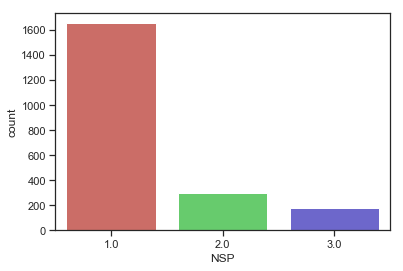

In [72]:
sns.countplot(x = 'NSP', data = finaldata, palette = 'hls')
plt.show()

# Removing null and unwanted columns

In [73]:
dataset_rmvCol = data.drop(columns=['FileName', 'SegFile', 'Date'])

In [74]:
finaldata = dataset_rmvCol.dropna()


# Spliting into train and Test

In [75]:
X = finaldata[['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV','DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax','Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS']]
y = finaldata[['NSP']]


In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# Applying Logistic Regression without Standardization

In [77]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [78]:
y_pred=logreg.predict(X_test)

In [79]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[386,  14,  10],
       [ 36,  33,   3],
       [  2,  11,  37]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

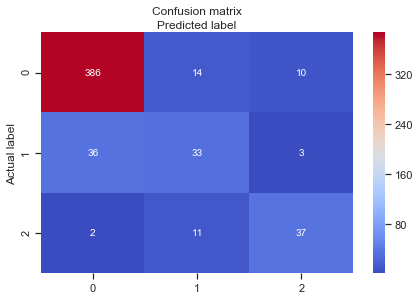

In [80]:
class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [81]:
# def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
#     lb = LabelBinarizer()
#     lb.fit(y_test)
#     y_test = lb.transform(y_test)
#     y_pred = lb.transform(y_pred)
#     return roc_auc_score(y_test, y_pred, average=average)
# auc = multiclass_roc_auc_score(y_test, y_pred, average="macro")
# print("Area under curve : ", auc)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8571428571428571


# Logistic Regression with Standardization

# Applying Standardization

In [82]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

# Spliting into train and Test

In [83]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# Applying Logistic Regression

In [84]:
logreg1 = LogisticRegression()
logreg1.fit(x_train,y_train)
y_pred1=logreg1.predict(x_test)

In [85]:
cnf_matrix1 = metrics.confusion_matrix(y_test, y_pred1)
cnf_matrix1

array([[406,   4,   0],
       [  5,  67,   0],
       [  0,   0,  50]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

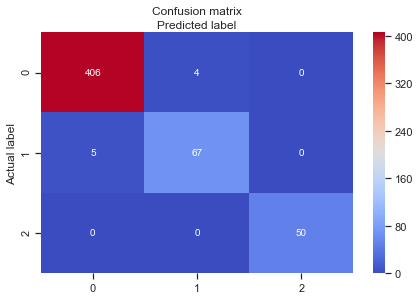

In [86]:
class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [87]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.9830827067669173


# CONCLUSION
<h2>Accuracy after Standardization is 98% and before it is 85%, Hence standardization improved the result</h2>

# Creators
<h1><b><i>Shashwat Shah and Rishabh Gaur</i></b></h1>